In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
img = x_train[0]

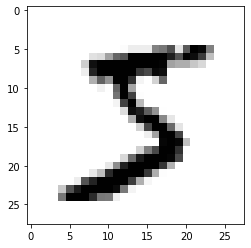

In [11]:
plt.imshow(img,cmap='gray_r')

In [13]:
y_train.shape

(60000,)

In [14]:
from keras.utils.np_utils import to_categorical

In [16]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [20]:
scaled_image = x_train[0]

In [22]:
#scaled_image

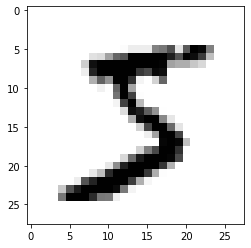

In [24]:
plt.imshow(scaled_image,cmap='gray_r')

In [25]:
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
from keras.models import Sequential


In [31]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [36]:
model = Sequential()

#Convultion Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer 2D to 1D
model.add(Flatten())

#Dense Layer
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 34s 562us/step - loss: 0.1391 - accuracy: 0.9582
Epoch 2/2
60000/60000 [==============================] - 30s 502us/step - loss: 0.0479 - accuracy: 0.9853


In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 146us/step


[0.03946680475848261, 0.9861000180244446]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
predictions = model.predict_classes(x_test)

In [45]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    0,    0,    0,    1,    1,    1,    0,    1],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   4,    5, 1013,    0,    3,    0,    1,    5,    1,    0],
       [   0,    0,    3,  997,    0,    4,    0,    4,    2,    0],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   2,    0,    0,    4,    0,  883,    2,    0,    1,    0],
       [   7,    3,    0,    0,    5,    3,  940,    0,    0,    0],
       [   1,    3,    5,    2,    0,    0,    0, 1015,    1,    1],
       [   8,    2,    3,    1,    4,    2,    1,    2,  944,    7],
       [   0,    5,    0,    1,    9,    5,    0,    5,    1,  983]])

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
hist = model.history.history

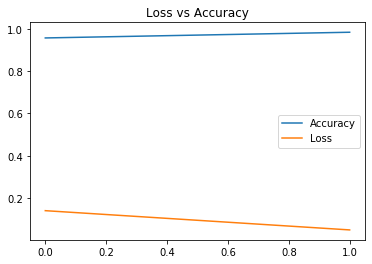

In [52]:
plt.figure()
plt.plot(hist['accuracy'],label='Accuracy')
plt.plot(hist['loss'],label='Loss')
plt.title('Loss vs Accuracy')
plt.legend()
plt.show()